Using transfer learning

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
!pip install requests

In [ ]:
!pip install transformers

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from transformers import ViTFeatureExtractor, TFViTModel
from tensorflow.keras.layers import Permute,Input,Dense, Dropout
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import requests
from io import BytesIO
from tensorflow.keras import layers

In [ ]:
with_mask_files = os.listdir('/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/with_mask')
without_mask_files = os.listdir('/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/without_mask')
print(with_mask_files[0:4])
print(without_mask_files[0:4])

['with_mask_3457.jpg', 'with_mask_346.jpg', 'with_mask_3452.jpg', 'with_mask_3450.jpg']
['without_mask_3535.jpg', 'without_mask_3558.jpg', 'without_mask_3540.jpg', 'without_mask_3561.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:4])
print(without_mask_labels[0:4])

[1, 1, 1, 1]
[0, 0, 0, 0]


In [ ]:
print(without_mask_labels[0:4])

[0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


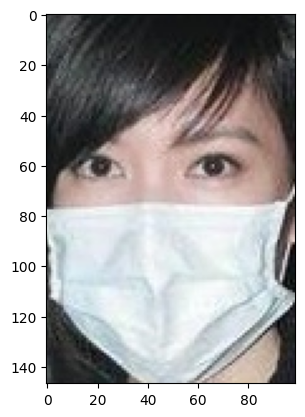

In [ ]:
img = mpimg.imread('/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/with_mask/with_mask_5.jpg')
imgplot = plt.imshow(img)
plt.show()

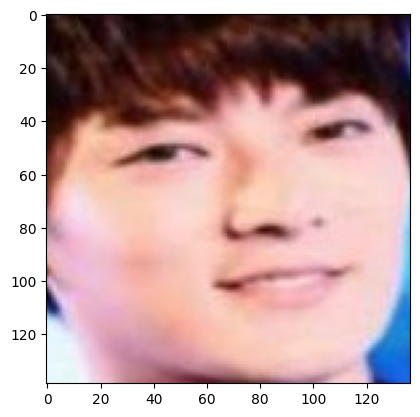

In [ ]:
img = mpimg.imread('/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/without_mask/without_mask_25.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#convert images to numpy arrays

with_mask_path = '/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/with_mask/'
data = []
for img_file in with_mask_files:
 image = Image.open(with_mask_path + img_file)
 image = image.resize((128,128))
 image = image.convert('RGB')
 image = np.array(image)
 data.append(image)




without_mask_path = '/drive/MyDrive/COLABNOTEBOOK/ODL/Data/data/without_mask/'


for img_file in without_mask_files:
 image = Image.open(without_mask_path + img_file)
 image = image.resize((128,128))
 image = image.convert('RGB')
 image = np.array(image)
 data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
Y_train = keras.utils.to_categorical(Y_train, num_classes=2)

In [ ]:
Y_test = keras.utils.to_categorical(Y_test, num_classes=2)

array([[[105, 115, 124],
        [106, 116, 125],
        [108, 118, 127],
        ...,
        [102, 112, 124],
        [102, 112, 124],
        [101, 111, 123]],

       [[110, 120, 129],
        [111, 121, 130],
        [113, 123, 132],
        ...,
        [ 99, 109, 121],
        [ 99, 109, 121],
        [ 98, 108, 120]],

       [[106, 116, 125],
        [107, 117, 126],
        [109, 119, 128],
        ...,
        [ 99, 109, 121],
        [ 99, 109, 121],
        [ 99, 109, 121]],

       ...,

       [[102, 114, 126],
        [102, 114, 126],
        [102, 114, 126],
        ...,
        [ 92, 104, 120],
        [ 93, 105, 121],
        [ 93, 105, 120]],

       [[101, 113, 125],
        [101, 113, 125],
        [101, 113, 125],
        ...,
        [ 84,  96, 112],
        [ 84,  96, 112],
        [ 86,  98, 113]],

       [[100, 112, 124],
        [ 99, 111, 123],
        [100, 112, 124],
        ...,
        [ 90, 102, 118],
        [ 91, 103, 119],
        [ 90, 102, 118]]], dtype=uint8)
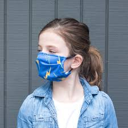

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.41176471, 0.45098039, 0.48627451],
        [0.41568627, 0.45490196, 0.49019608],
        [0.42352941, 0.4627451 , 0.49803922],
        ...,
        [0.4       , 0.43921569, 0.48627451],
        [0.4       , 0.43921569, 0.48627451],
        [0.39607843, 0.43529412, 0.48235294]],

       [[0.43137255, 0.47058824, 0.50588235],
        [0.43529412, 0.4745098 , 0.50980392],
        [0.44313725, 0.48235294, 0.51764706],
        ...,
        [0.38823529, 0.42745098, 0.4745098 ],
        [0.38823529, 0.42745098, 0.4745098 ],
        [0.38431373, 0.42352941, 0.47058824]],

       [[0.41568627, 0.45490196, 0.49019608],
        [0.41960784, 0.45882353, 0.49411765],
        [0.42745098, 0.46666667, 0.50196078],
        ...,
        [0.38823529, 0.42745098, 0.4745098 ],
        [0.38823529, 0.42745098, 0.4745098 ],
        [0.38823529, 0.42745098, 0.4745098 ]],

       ...,

       [[0.4       , 0.44705882, 0.49411765],
        [0.4       , 0.44705882, 0.49411765],
        [0.4       , 0

In [ ]:
num_of_classes = 2

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

for layer in resnet.layers:
    layer.trainable = False

model_ResNet50= keras.Sequential()
model_ResNet50.add(resnet)
model_ResNet50.add(keras.layers.GlobalAveragePooling2D())
model_ResNet50.add(keras.layers.Dense(128, activation='relu'))
model_ResNet50.add(keras.layers.Dense(64, activation='relu'))
model_ResNet50.add(keras.layers.Dropout(0.3))
model_ResNet50.add(keras.layers.Dense(32, activation='relu'))

model_ResNet50.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model_ResNet50.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                20

In [ ]:
model_ResNet50.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history_ResNet50 = model_ResNet50.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=10, batch_size=30)

Epoch 1/10
202/202 [==============================] - 315s 2s/step - loss: 0.6786 - acc: 0.5684 - val_loss: 0.6452 - val_acc: 0.6300
Epoch 2/10
202/202 [==============================] - 304s 2s/step - loss: 0.6408 - acc: 0.6379 - val_loss: 0.5983 - val_acc: 0.6936
Epoch 3/10
202/202 [==============================] - 303s 2s/step - loss: 0.6102 - acc: 0.6723 - val_loss: 0.5773 - val_acc: 0.7062
Epoch 4/10
202/202 [==============================] - 275s 1s/step - loss: 0.5893 - acc: 0.6913 - val_loss: 0.6375 - val_acc: 0.6446
Epoch 5/10
202/202 [==============================] - 301s 1s/step - loss: 0.5571 - acc: 0.7216 - val_loss: 0.5207 - val_acc: 0.7558
Epoch 6/10
202/202 [==============================] - 275s 1s/step - loss: 0.5416 - acc: 0.7413 - val_loss: 0.5056 - val_acc: 0.7651
Epoch 7/10
202/202 [==============================] - 302s 1s/step - loss: 0.5239 - acc: 0.7463 - val_loss: 0.5504 - val_acc: 0.7280
Epoch 8/10
202/202 [==============================] - 302s 1s/step - 

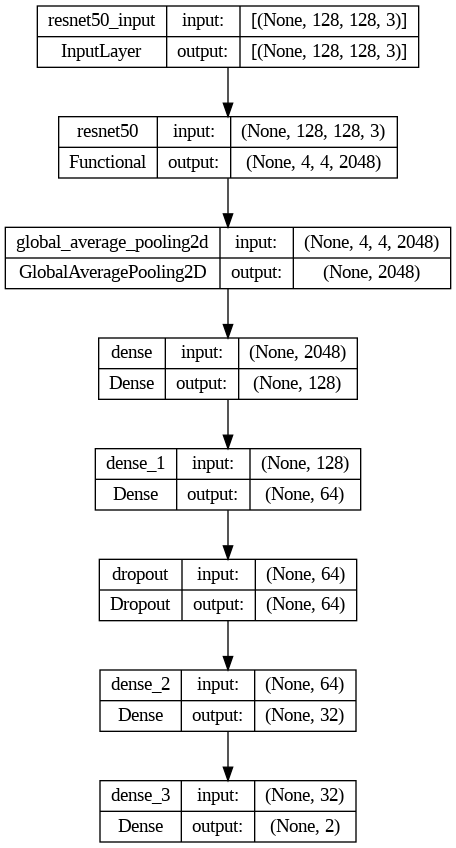

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_ResNet50, show_shapes=True)

In [ ]:
test_loss, test_accuracy = model_ResNet50.evaluate(X_test_scaled, Y_test)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

48/48 [==============================] - 56s 1s/step - loss: 0.5399 - acc: 0.7247
Loss: 0.5398672819137573, Accuracy: 0.7246856093406677


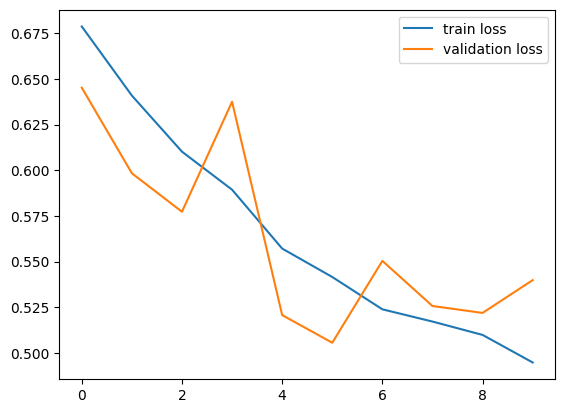

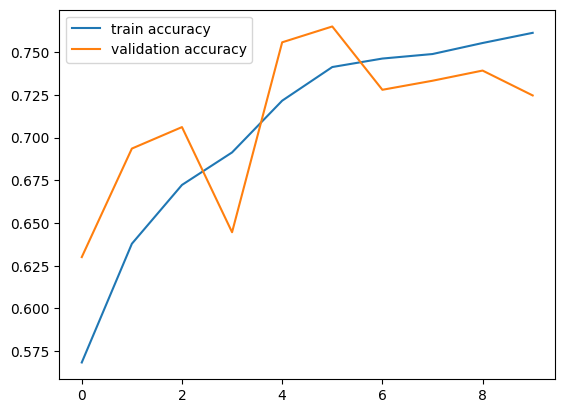

In [ ]:
h1 = history_ResNet50

plt.plot(h1.history['loss'], label='train loss')
plt.plot(h1.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h1.history['acc'], label='train accuracy')
plt.plot(h1.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

48/48 [==============================] - 57s 1s/step


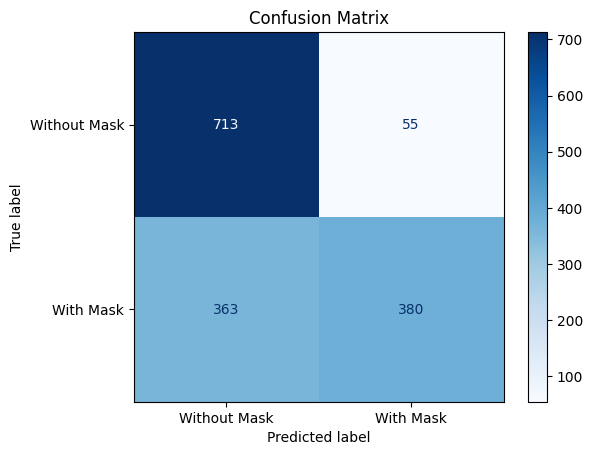

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = model_ResNet50.predict(X_test_scaled)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

Y_test_categorical = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test_categorical, np.argmax(y_pred_binary, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Without Mask", "With Mask"])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: print classification report

import numpy as np
from sklearn.metrics import classification_report

print(classification_report(Y_test_categorical, np.argmax(y_pred_binary, axis=1)))


              precision    recall  f1-score   support

           0       0.66      0.93      0.77       768
           1       0.87      0.51      0.65       743

    accuracy                           0.72      1511
   macro avg       0.77      0.72      0.71      1511
weighted avg       0.77      0.72      0.71      1511



Using DenseNet121

In [ ]:
num_of_classes=2
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

for layer in densenet.layers:
    layer.trainable = False

model_DenseNet = keras.Sequential()
model_DenseNet.add(densenet)
model_DenseNet.add(keras.layers.Flatten())
model_DenseNet.add(keras.layers.Dense(128, activation='relu'))
model_DenseNet.add(keras.layers.Dropout(0.5))
model_DenseNet.add(keras.layers.Dense(64, activation='relu'))
model_DenseNet.add(keras.layers.Dropout(0.5))
model_DenseNet.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model_DenseNet.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2097280   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                       

In [ ]:
model_DenseNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history_DenseNet = model_DenseNet.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=10, batch_size=30)

Epoch 1/10
202/202 [==============================] - 281s 1s/step - loss: 0.2333 - acc: 0.9551 - val_loss: 0.0410 - val_acc: 0.9868
Epoch 2/10
202/202 [==============================] - 268s 1s/step - loss: 0.0836 - acc: 0.9763 - val_loss: 0.0436 - val_acc: 0.9854
Epoch 3/10
202/202 [==============================] - 269s 1s/step - loss: 0.0787 - acc: 0.9757 - val_loss: 0.0431 - val_acc: 0.9854
Epoch 4/10
202/202 [==============================] - 268s 1s/step - loss: 0.0785 - acc: 0.9740 - val_loss: 0.0460 - val_acc: 0.9894
Epoch 5/10
202/202 [==============================] - 267s 1s/step - loss: 0.0799 - acc: 0.9795 - val_loss: 0.0380 - val_acc: 0.9894
Epoch 6/10
202/202 [==============================] - 268s 1s/step - loss: 0.0658 - acc: 0.9810 - val_loss: 0.0517 - val_acc: 0.9861
Epoch 7/10
202/202 [==============================] - 266s 1s/step - loss: 0.0455 - acc: 0.9882 - val_loss: 0.0461 - val_acc: 0.9874
Epoch 8/10
202/202 [==============================] - 267s 1s/step - 

In [ ]:
test_loss, test_accuracy = model_DenseNet.evaluate(X_test_scaled, Y_test)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

48/48 [==============================] - 48s 1s/step - loss: 0.0400 - acc: 0.9921
Loss: 0.039975326508283615, Accuracy: 0.9920582175254822


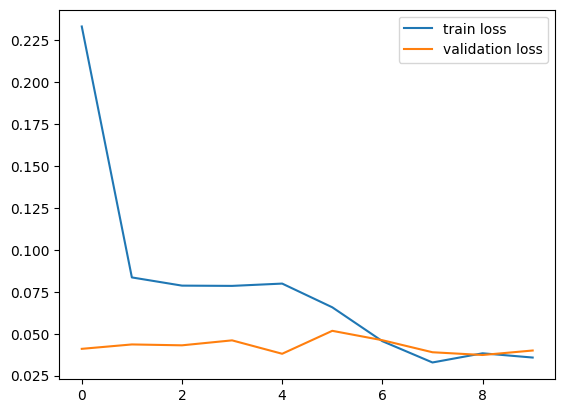

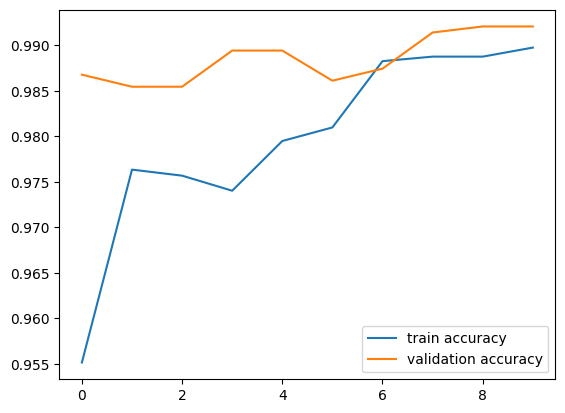

In [ ]:
h2 = history_DenseNet

plt.plot(h2.history['loss'], label='train loss')
plt.plot(h2.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h2.history['acc'], label='train accuracy')
plt.plot(h2.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

48/48 [==============================] - 50s 1s/step


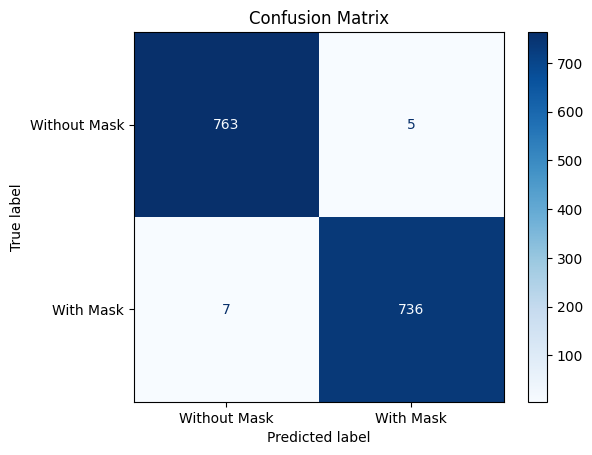

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = model_DenseNet.predict(X_test_scaled)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

Y_test_categorical = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test_categorical, np.argmax(y_pred_binary, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Without Mask", "With Mask"])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: print classification report

import numpy as np
from sklearn.metrics import classification_report

print(classification_report(Y_test_categorical, np.argmax(y_pred_binary, axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       768
           1       0.99      0.99      0.99       743

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511

